# **Black Money Transactions**
###**Fall 2024 Data Science Project**

###**Karin Ozturk, Clara O'Brien**
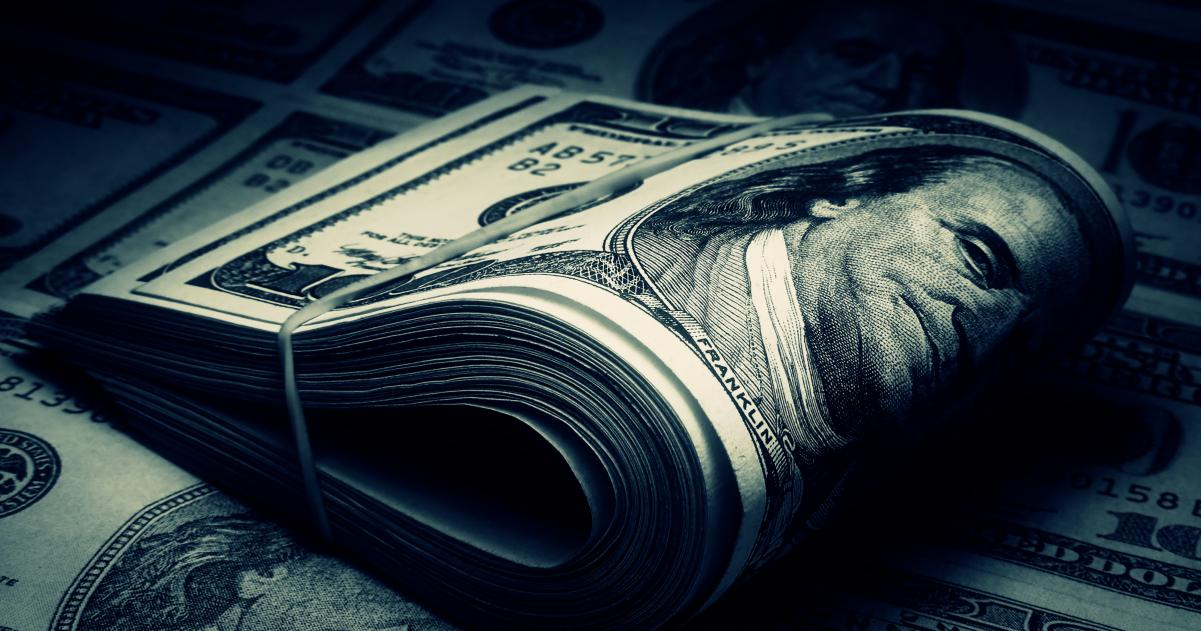

## Contributions

**Karin Ozturk:**
Project idea

Dataset Curation and Preprocessing

ML Algorithm Design/Development

ML Algorithm Training and Test Data Analysis

Final Tutorial Report Creation

**Clara O'Brien:**
Dataset Curation and Preprocessing

Data Exploration and Summary Statistics

ML Algorithm Design/Development

Visualization, Result Analysis, Conclusion

Final Tutorial Report Creation


**Summary of Contributions**

Karin proposed the initial project idea and found the dataset and contributed alongside Clara to design and develop the ML algorithms, train the models, and analyze the test data.

Clara focused more on curating and preprocessing the dataset, and conducted data exploration with summary statistics. Clara also designed and developed the ML algorithms and led the efforts in visualizing results, and analyzing conclusions.

We worked in tandem for the creation of the final tutorial report.

##(1) Introduction



The movement of illicit funds, commonly referred to as "black money" is a critical global issue that is growing day by day, as financial crimes are becoming more common and more complex. The issue of black money transfers is one that is important as these illicit funds undermine economic stability and foster corruption. This project aims to analyze and discover patterns and anomalies in black money transactions using a global dataset of financial transactions, sourced from Kaggle's "Global Black Money Transactions Dataset" (link: https://www.kaggle.com/datasets/waqi786/global-black-money-transactions-dataset). This dataset provides detailed insights into suspicious transaction patterns across various countries, including transaction amounts, origins, destinations, industry and much more.


The primary areas we aim to investigate are the **patterns or characteristics that can be identified in black money transactions**. Exploring this and finding these patterns is crucial as it can assist in building robust financial monitoring systems and thus reducing the transfer of illicit funds. Our hope is that the findings in this project can help inform financial crimes investigators about the trends in criminal transactions so they may more accurately identify those transactions.

We'll stick to the following outline:
1. Introduction (you are here!)
2. Data Curation
3. Exploratory Data Analysis
4. Primary Analysis
5. Visualization
6. Insights and Conclusions

##(2) Data Curation


As previously mentioned, the dataset used in this project is the "**Global Black Money Transactions Dataset**", sourced from Kaggle ([link to dataset](https://www.kaggle.com/datasets/waqi786/global-black-money-transactions-dataset)). This dataset provides comprehensive information on financial transactions suspected to involve illicit funds.

The dataset contains detailed attributes which will be essential and useful for our analysis, including origin of country of the funds, the destination country, amount, industry, transaction dates and much more. It represents a variety of scenarios in which black money might be laundered or moved between entities, providing a valuable resource for detecting characteristics of illicit fund transfers, patterns and anomalies.

Below we will curate and preprocess the dataset, to ensure the data is clean, consistent and ready for analysis.

First off, we need to import some libraries for later use. Our most important tools will be matplotlib for visualization, scipy for some hypothesis testing, and sklearn for our machine learning algorithms.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

from scipy.stats import chi2_contingency, kruskal
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# after all that importing, our dataframe
# we noticed that in some cases, our strings were converted to integers
# --> we fix that here.
transactions_df = pd.read_csv('Big_Black_Money_Dataset.csv', dtype = {'Country':'str',
                                                                      'Transaction Type':'str',
                                                                      'Industry':'str',
                                                                      'Destination Country':'str',
                                                                      'Source of Money':'str'})



Dropping the 'Financial Institution' and 'Person Involved' columns because the institutions and people are numbered and not named, so the information isn't useful or interesting for our needs.

In [ ]:
transactions_df = transactions_df.drop(['Financial Institution', 'Person Involved'], axis = 1)

Formatting the transaction date as a datetime object. This makes it nicer to read if we choose to use the date information.

In [ ]:
transactions_df['Date of Transaction'] = pd.to_datetime(transactions_df['Date of Transaction'])

Rounding the USD amount to 2 decimal points and using decimal notation instead of scientific notation for readability.

In [ ]:
transactions_df['Amount (USD)'] = transactions_df['Amount (USD)'].round(2)

Notice that before, some of the strings were formatted as int64. We fixed this upon importing the dataframe by manually indicating the intended types. Here's what we ended up with:

In [ ]:
transactions_df.dtypes

,0
Transaction ID,object
Country,object
Amount (USD),float64
Transaction Type,object
Date of Transaction,datetime64[ns]
Industry,object
Destination Country,object
Reported by Authority,bool
Source of Money,object
Money Laundering Risk Score,int64


This will make it a lot easier to analyze the information that the dataframe gives us.

Now, our nice dataframe:

In [ ]:
transactions_df

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Tax Haven Country
0,TX0000000001,Brazil,3267530.48,Offshore Transfer,2013-01-01 00:00:00,Construction,USA,True,Illegal,6,1,Singapore
1,TX0000000002,China,4965766.73,Stocks Transfer,2013-01-01 01:00:00,Luxury Goods,South Africa,False,Illegal,9,0,Bahamas
2,TX0000000003,UK,94167.50,Stocks Transfer,2013-01-01 02:00:00,Construction,Switzerland,True,Illegal,1,3,Switzerland
3,TX0000000004,UAE,386420.14,Cash Withdrawal,2013-01-01 03:00:00,Oil & Gas,Russia,False,Illegal,7,2,Panama
4,TX0000000005,South Africa,643378.43,Cryptocurrency,2013-01-01 04:00:00,Real Estate,USA,True,Illegal,1,9,Luxembourg
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX0000009996,Singapore,2209228.64,Offshore Transfer,2014-02-21 11:00:00,Real Estate,Brazil,False,Illegal,4,4,Luxembourg
9996,TX0000009997,UAE,4800337.97,Property Purchase,2014-02-21 12:00:00,Luxury Goods,Russia,False,Legal,10,2,Luxembourg
9997,TX0000009998,UK,489195.27,Stocks Transfer,2014-02-21 13:00:00,Oil & Gas,Russia,False,Illegal,5,0,Cayman Islands
9998,TX0000009999,Brazil,2233580.52,Offshore Transfer,2014-02-21 14:00:00,Real Estate,Russia,True,Illegal,10,5,Singapore


Looks good! We see some potentially important columns: Amount, Transaction Type, Country, and Source of Money. These will be interesting to dive into.

##(3) Exploratory Data Analysis

There's some ideas we want to visualize and take a look at in this dataset. We hope to gain some idea of how the data might be distributed, and subsequently get some ideas on how we can analyze it to gain some insights into our conclusion.

###Some Basic Visualization

Let's get some ideas about these categorical distributions with some graphs.

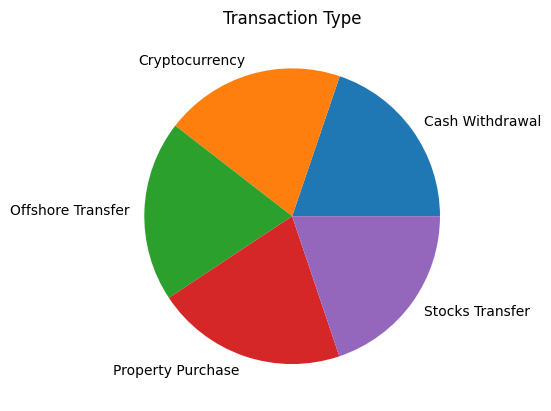

In [ ]:
transaction_type_df_size = transactions_df.groupby(['Transaction Type']).size()
transaction_type_df_keys = transactions_df.groupby(['Transaction Type']).groups.keys()

plt.pie(transaction_type_df_size, labels = transaction_type_df_keys)
plt.title('Transaction Type')
plt.show()

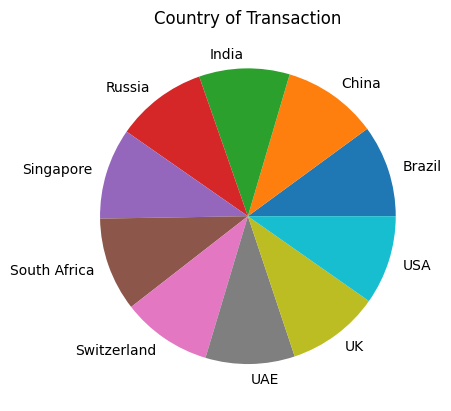

In [ ]:
transaction_type_df_size = transactions_df.groupby(['Country']).size()
transaction_type_df_keys = transactions_df.groupby(['Country']).groups.keys()

plt.pie(transaction_type_df_size, labels = transaction_type_df_keys)
plt.title('Country of Transaction')
plt.show()

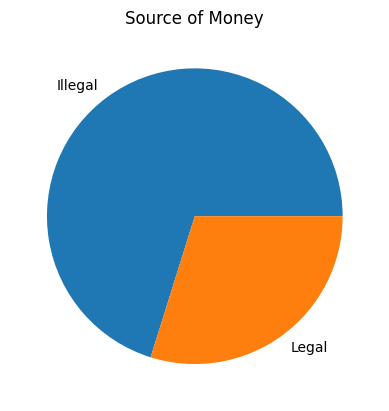

In [ ]:
transaction_type_df_size = transactions_df.groupby(['Source of Money']).size()
transaction_type_df_keys = transactions_df.groupby(['Source of Money']).groups.keys()

plt.pie(transaction_type_df_size, labels = transaction_type_df_keys)
plt.title('Source of Money')
plt.show()

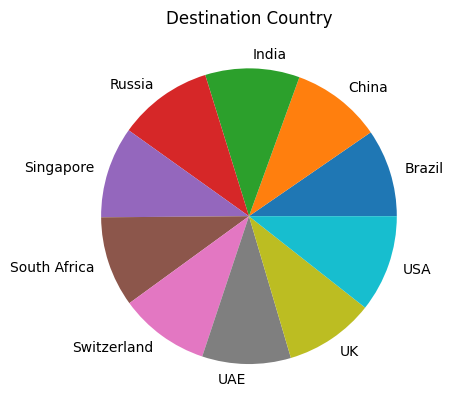

In [ ]:
transaction_type_df_size = transactions_df.groupby(['Destination Country']).size()
transaction_type_df_keys = transactions_df.groupby(['Destination Country']).groups.keys()

plt.pie(transaction_type_df_size, labels = transaction_type_df_keys)
plt.title('Destination Country')
plt.show()

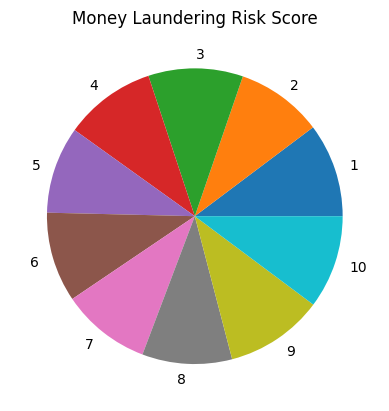

In [ ]:
transaction_type_df_size = transactions_df.groupby(['Money Laundering Risk Score']).size()
transaction_type_df_keys = transactions_df.groupby(['Money Laundering Risk Score']).groups.keys()

plt.pie(transaction_type_df_size, labels = transaction_type_df_keys)
plt.title('Money Laundering Risk Score')
plt.show()

Interestingly enough, the sample that this data represents is actually very evenly distributed among categories. This will make it much easier to identify differences among these categories, since we won't be lacking data for any group, and no groups will dominate the data.

We also notice that we have about 70% illegal money sources, which gives us a lot of information to analyze, but we still have about 30% legal sources, which is nice to compare to.

Now, we want to get some more concrete ideas about our dataset. We'd like to uncover some patterns that might give us a clue as to how the data behaves, and some indicators into answering our questions. We'll use hypothesis testing to uncover these patterns, with three hypotheses.

###**Hypothesis One**

Some immediately interesting data in the dataset is the variation of the dollar amounts. It would be interesting to know if the type of transaction affects the amount of money sent.



* **Null Hypothesis** ➡ The average transaction amount is the same across different transaction types.
* **Alternative Hypothesis** ➡ At least one transaction type has a different average transaction amount.

We want to see if we can use an ANOVA test to compare the means of each type of transaction so we need to check if we meet the assumptions required to be met for ANOVA.

The required assumptions for ANOVA include:

1. Independence ➡ the transactions must be independent of eachother (this is true thus this condition is met as the samples are unrelated).
2. Normality ➡ Each group's transaction amount should follow a normal distribution. We will check for this.
3. Equal Variance ➡ The variance within each group should be roughly equal. We can also check for this.

Let's first check for normality across group's transaction amounts.
First, we see how many unique transaction types there are:

In [ ]:
transactions_df['Transaction Type'].unique()

array(['Offshore Transfer', 'Stocks Transfer', 'Cash Withdrawal',
       'Cryptocurrency', 'Property Purchase'], dtype=object)

Then we group the data by transaction type.

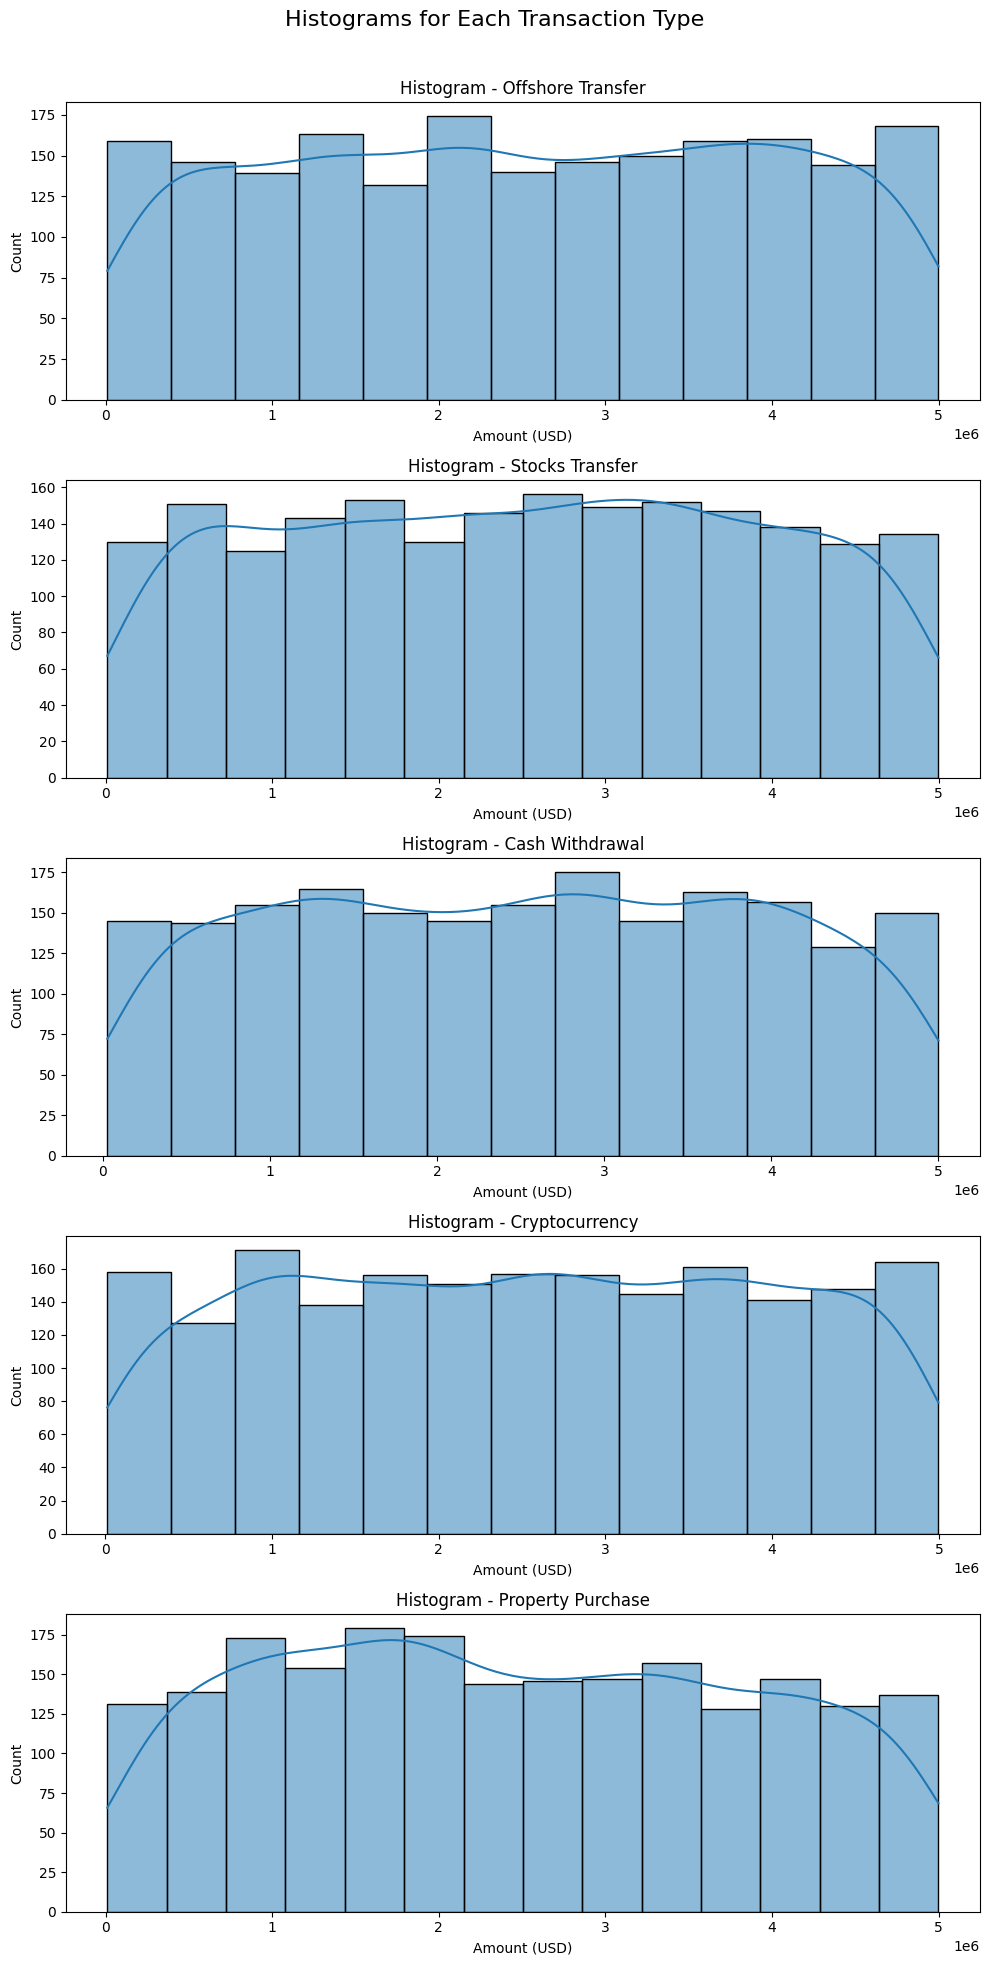

In [ ]:
type_df = transactions_df.groupby(by='Transaction Type')

offshore_transfer = type_df.get_group('Offshore Transfer')['Amount (USD)']
stocks_transfer = type_df.get_group('Stocks Transfer')['Amount (USD)']
cash_withdrawal = type_df.get_group('Cash Withdrawal')['Amount (USD)']
cryptocurrency = type_df.get_group('Cryptocurrency')['Amount (USD)']
property_purchase = type_df.get_group('Property Purchase')['Amount (USD)']

groups = {
    'Offshore Transfer': offshore_transfer,
    'Stocks Transfer': stocks_transfer,
    'Cash Withdrawal': cash_withdrawal,
    'Cryptocurrency': cryptocurrency,
    'Property Purchase': property_purchase
}

fig, axs = plt.subplots(5, 1, figsize=(10, 20))
fig.suptitle('Histograms for Each Transaction Type', fontsize=16)

for idx, (group_name, group_data) in enumerate(groups.items()):
    sns.histplot(group_data, kde=True, ax=axs[idx])
    axs[idx].set_title(f'Histogram - {group_name}')
    axs[idx].set_xlabel('Amount (USD)')
    axs[idx].set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Note that the Amount (USD) x-axis in the histograms are in scientific notation.

From the histograms above, we can see that these histograms do not follow a normal distribution. Thus, we will not apply ANOVA. However, all histograms follow a fairly similar distribution - which implies we can apply  the Kruskal-Wallis test, given we meet the other required assumptions.

The assumptions required for a Kruskal-Wallis test include:
1. Independent Samples ➡ Each sample (transaction type) should be independent of the others. Given the nature of transaction types, this assumption is met.
2. Ordinal or Continuous Data ➡ The test requires ordinal or continuous data. Since transaction amounts are continuous, this assumption is met.
3. Similar Distributions ➡ The test assumes that the distributions have a similar shape (but not necessarily normal). By visually inspecting our histograms from above, we can confirm that the shapes are not drastically different.

Thus, we will use the Kruskal-Wallis test.

We'll set our significance level (α) to be 0.05.

In [ ]:

kruskal_stat, kruskal_p_value = kruskal(
    offshore_transfer,
    stocks_transfer,
    cash_withdrawal,
    cryptocurrency,
    property_purchase
)

kruskal_results = {
    "Kruskal-Wallis Statistic": kruskal_stat,
    "P-value": kruskal_p_value
}

kruskal_results


{'Kruskal-Wallis Statistic': 3.790362051808188, 'P-value': 0.43512001634753017}

Since our p-value is approximately 0.435 where 0.435 > 0.05, we fail to reject our null hypothesis. Hence, we support our null hypothesis of the average transaction amount being the same across different transaction types.

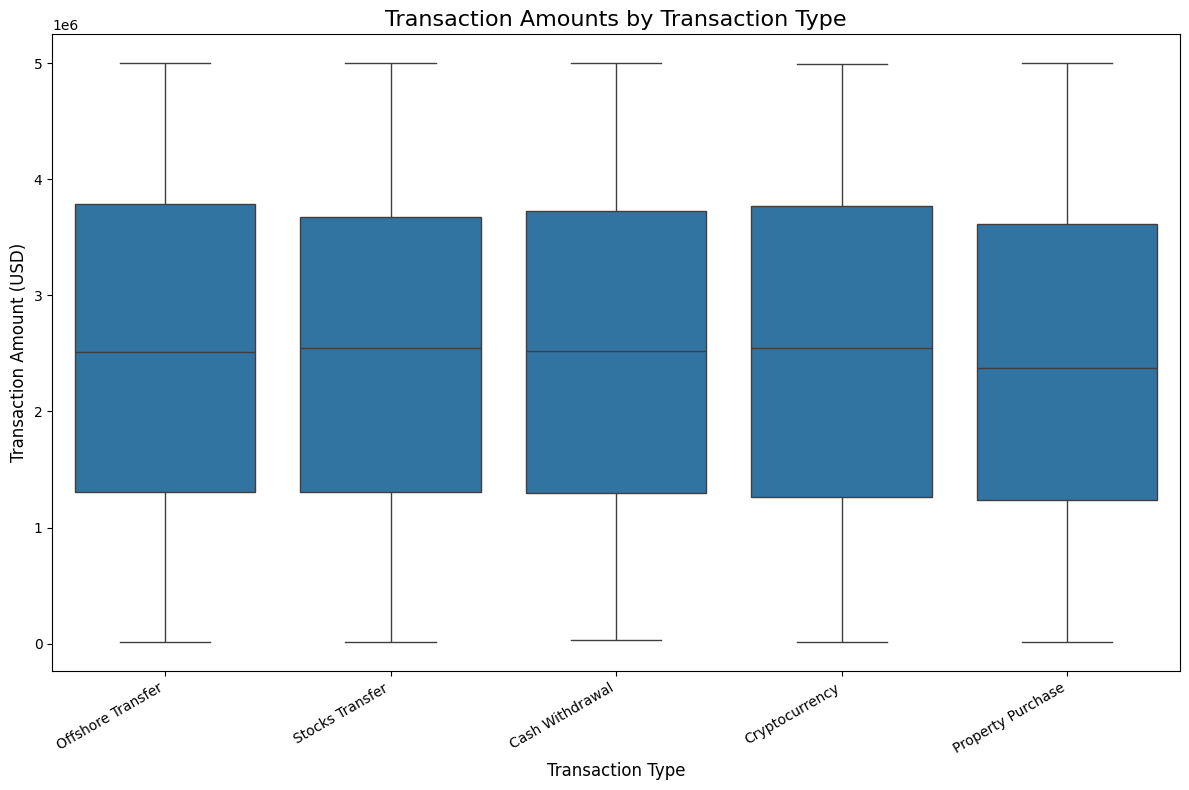

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(x='Transaction Type', y='Amount (USD)', data=transactions_df, ax=ax)

ax.set_title('Transaction Amounts by Transaction Type', fontsize=16)
ax.set_xlabel('Transaction Type', fontsize=12)
ax.set_ylabel('Transaction Amount (USD)', fontsize=12)
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

Note that the transaction amount x axis is in scientific notation for the box plot above.

###**Hypothesis Two**
We will now focus on determining if there is a significant association between the origin country and the source of money (legal or illegal). We can set up the hypothesis test below:

*   **Null Hypothesis** ➡ There is no association between the origin country and the source of money. Simply put, this implies the distribution of legal and illegal transactions is independent of the country.
*   **Alternative Hypothesis** ➡ There is an association between the origin country and the source of money. The distribution of legal and illegal transactions depends on the country.



We will use a significance level of 0.05 for α.

We want to use the Chi-Squared test of independence to compare the observed counts of legal and illegal transactions for each country with the expected counts (if there were no association).

First let's check if we meet the required assumptions:



1. Independence of observations -> Observations must be independent. Each transaction should be unrelated to others. This is true.
2. Categorical variables -> Both variables must be categorical (so both, "Country" and "Source of Money" need to be categorical). This is also true.
3. Each cell in the contingency table should have an expected count of at least 5. This is also true (checked below).


In [ ]:
contingency_table = pd.crosstab(transactions_df['Country'], transactions_df['Source of Money'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("There is statistically significant association between the origin country and the source of money (legal vs illegal).")
else:
    print("There is no statistically significant association between the origin country and the source of money (legal vs illegal).")

Chi-squared statistic: 12.020431063499451
P-value: 0.21215994919834158
Degrees of freedom: 9
There is no statistically significant association between the origin country and the source of money (legal vs illegal).


In [ ]:
_, _, _, expected = chi2_contingency(contingency_table)
print((expected < 5).any())  # returns false if all counts are bigger than or equal to 5

False


The code right above this is just checking the third assumption for the chi-squared test, which is met. Given the p-value of approximately 0.21216, we fail to reject the null hypothesis, suggesting there is no significant association between the origin country and the source of money.

Below is a graph for this data.

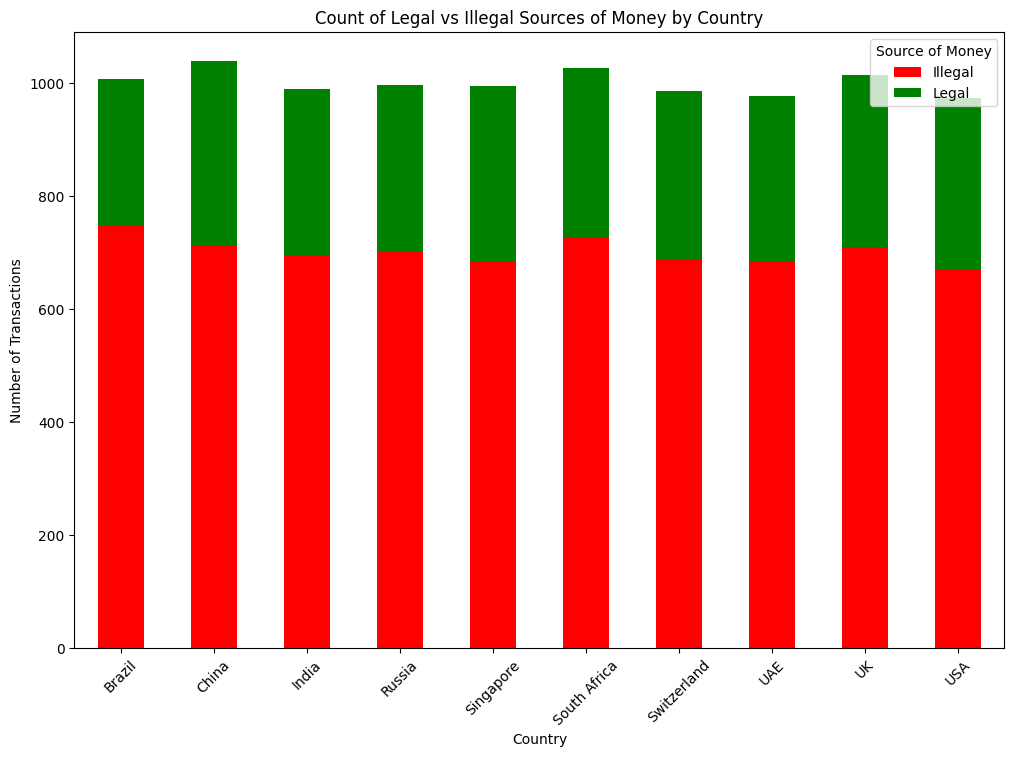

In [ ]:
contingency_table = pd.crosstab(transactions_df['Country'], transactions_df['Source of Money'])

fig, ax = plt.subplots(figsize=(12, 8))

contingency_table.plot(kind='bar', stacked=True, ax=ax, color=['red', 'green'])
ax.set_title('Count of Legal vs Illegal Sources of Money by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Transactions')
ax.legend(title='Source of Money')
plt.xticks(rotation=45, ha='center')


plt.show()

###**Hypothesis Three**
Finally, we want to see if the USA has the same average transaction amount compared to the population average of all countries. We hope to do this by performing a one sample T-test. We will set α to 0.05.

*   **Null Hypothesis** ➡ The USA has the same average transaction amount as the whole dataset of transactions.
*   **Alternative Hypothesis** ➡ The USA has a different average transaction amount than the whole dataset of transactions.

First let's check if we meet the required assumptions for a one sample t-test. The required assumptions are:

1. Independence ➡ Each transaction amount in the sample (USA) must be independent from others. This is true.
2. Normality ➡ The sample data (transaction amounts for the USA) should be normally distributed, especially if the sample size is small (n < 30). For larger samples, this is less critical. Note that since we do have a large sample, this condition is also met.

So, we can do our test:

In [ ]:
population_mean = transactions_df['Amount (USD)'].mean()
stats.ttest_1samp(transactions_df[transactions_df['Country'] == 'USA']['Amount (USD)'], population_mean).pvalue

0.033757270286457766

Since our T-test results in a p-value of ~0.03 < α, we conclude that there is not enough evidence to support that the USA has the same average transaction amount as the whole dataset i.e. reject the null hypothesis.

Below is a graph of the USA mean vs the population mean:

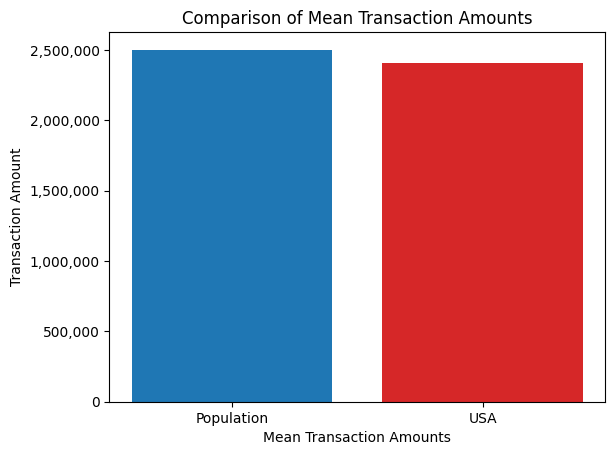

In [ ]:
means = [population_mean, transactions_df[transactions_df['Country'] == 'USA']['Amount (USD)'].mean()]
categories = ['Population', 'USA']
fig, ax = plt.subplots()
colors = ['tab:blue', 'tab:red']
ax.bar(categories, means, color = colors)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.set_title('Comparison of Mean Transaction Amounts')
ax.set_ylabel('Transaction Amount')
ax.set_xlabel('Mean Transaction Amounts')

plt.show()

Although it may not look like much of a difference, this statistical analysis revealed that the USA tends to have a lower transaction amount than the other countries in the dataset. This may provide reason for investigators to measure transaction amount thresholds independently for each country, rather than grouping them together.

##(4,5) Primary Analysis and Visualization


Based on the exploration of the dataset, we are going to pursue a **classification approach**. Our goal is to identify patterns in illicit fund transactions and predict whether a given transaction is suspicious.


**Reasoning for Choosing Classification**


1.   Nature of the Problem

The dataset invludes categorical variables such as "Money Laundering Risk Score" and "Reported by Authority", which are indicators of suspicious activities. Predicting whether a transaction falls into a "high-risk" or "low-risk" category naturally lends itself to a classification task.



2.   Relevant Features for Classification

Many different attributes such as the transaction amount, origin country or destination country, transaction industry/type will provide valuable information in aiding the discovery of suspicious patterns.

Furthermore, other features such as "Shell Companies Involved" and "Tax Haven Country" are directly related to suspicious financial activities, and can serve as strong predictors.

<font color="blue">**What are Shell Companies and Tax Haven Countries?**</font>

<font color="blue">You may be wondering what shell companies and tax haven countries are in the context of transfer of illicit funds.

<font color="blue">Simply put, shell companies are businesses that exist only on paper, with no actual operations or employees. They are often used to hide the true ownership of funds making it easier to launder money or just avoid taxes. For example, if a person wants to hide illegal money, they can create a fake company, which does not do any real business. They move their money into this fake company and make it look like it is coming from legitimate sales. Thus, through this, no one knows where the money really came from and this results in successfully laundered money.

Tax Haven Countries are countries with low or no taxes and strict privacy laws, often used to hide money or assets. Illicit transactions are routed through these countries to avoid detection and also taxation. Some common tax haven countries utilized for such money transfers include the Cayman Islands, Switzerland, Panama, Bermuda and more. To further understand tax haven countries, consider this example: imagine someone earns lots of illegal money and does not want to pay taxes or get caught. They open a bank account in a tax haven country such as the Cayman Islands, where privacy laws protect their identity. They send their money there and pretend it's from legal business profits. This results them in avoiding taxes and also avoids raising suspicion. </font>

<font color="black">


3.   Potential Output

By building a classification model, we can predict different things such as:


*   Whether a transaction is likely to involve money laundering.
*   The risk level associated with a transaction (such as low, medium, or high risk).


4.   Practical Aspect

Classification models such as logistic regression, random forests, decision trees and others, are commonly utilized in financial fraud detection systems in real-world scenarios. The output from such a model could provide actionable insights for financial institutions and regulatory authorities.



###Choosing a Classification Algorithm

We want to see if we have a classification algorithm with a decent accuracy for identifying whether or not a transaction has an illegal money source. If such a model exists, we know that it is possible to use a machine learning model to assist in the identification of such transactions. However, if the model is not spot-on in its predictions, we can conclude that it should only be used to identify possible illegal transactions, and not used as evidence against a transactor.

To do this, we're going to compare a few classification algorithms and see which ones have a higher mean accuracy. Our method will be K-Fold Cross-Validation, which will hopefully give us insight into which algorithm we can put more faith into, and which ones are unreliable.

In [ ]:
# encoding categorical variables
categorical_columns = ['Country', 'Transaction Type', 'Industry', 'Destination Country', 'Source of Money', 'Tax Haven Country']
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    transactions_df[col] = label_encoders[col].fit_transform(transactions_df[col])

transactions_df['Source of Money'] = LabelEncoder().fit_transform(transactions_df['Source of Money'])

# defining features and target
X = transactions_df[['Amount (USD)', 'Country', 'Transaction Type', 'Industry',
                     'Destination Country', 'Shell Companies Involved', 'Tax Haven Country']]
y = transactions_df['Source of Money'] #target

# splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# getting our data into a reasonable scale
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

# testing some models
models = {
"KNN": KNeighborsClassifier(), "DecisionTree": DecisionTreeClassifier(), "Random Forest": RandomForestClassifier()
         }

# using k-fold cross-validation
k_folds = 5
skf = StratifiedKFold(n_splits = k_folds, shuffle = True, random_state = 42)

for model_name, model in models.items():
    np.random.seed(42)
    score = cross_val_score(model, X_test_scaled, y_test, cv = skf)
    print(model_name, score.mean(), score.std()) # print a score

KNN 0.6506666666666666 0.014628738838327757
DecisionTree 0.5813333333333333 0.014847371634213413
Random Forest 0.69 0.004830458915396484


Out of the three classification algorithms, we see that the decision tree classifier performed the worst, and random forest performed the best. KNN lagged a bit behind random forest. The random forest classifier also had a much lower standard deviation, so it tends to perform the same across the data, which is good news.

For this project, we conclude that we will utilize the **Random Forest Classifier** for our choice of classification algorithm. This algorithm fits our purpose for many different reasons such as that it successfully handles mixed data types, works well with imbalanced data, and provides feature importance scores, allowing us to understand which attributes such as shell companies involved contribute most to predicting suspicious transactions. Furthermore, due to its ensemble nature, Random Forest is less likely to overfit noisy data, making it more reliable for a complex dataset like the one we are utilizing.



In [ ]:
# training the random forest classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
#class_weight = 'balanced' parameter automatically adjusts the weights of the classes based on their frequencies
#gives more importance to minority class (in this case, 'Illegal') to prevent the model from being biased toward the majority class ('Legal').
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=False)

# we want to go into a little more depth with the random forest classifier to see exactly how it's performing
print("Random Forest Classifier Accuracy:")
print(f"Accuracy: {accuracy:.2f}\n")

print("Confusion Matrix:")
print(pd.DataFrame(
    conf_matrix,
    columns=["Predicted Legal", "Predicted Illegal"],
    index=["Actual Legal", "Actual Illegal"]
))

print("\nClassification Report:")
print(class_report)


Random Forest Classifier Accuracy:
Accuracy: 0.69

Confusion Matrix:
                Predicted Legal  Predicted Illegal
Actual Legal               2031                 74
Actual Illegal              870                 25

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      2105
           1       0.25      0.03      0.05       895

    accuracy                           0.69      3000
   macro avg       0.48      0.50      0.43      3000
weighted avg       0.57      0.69      0.58      3000



Let's see what our tree actually looks like.

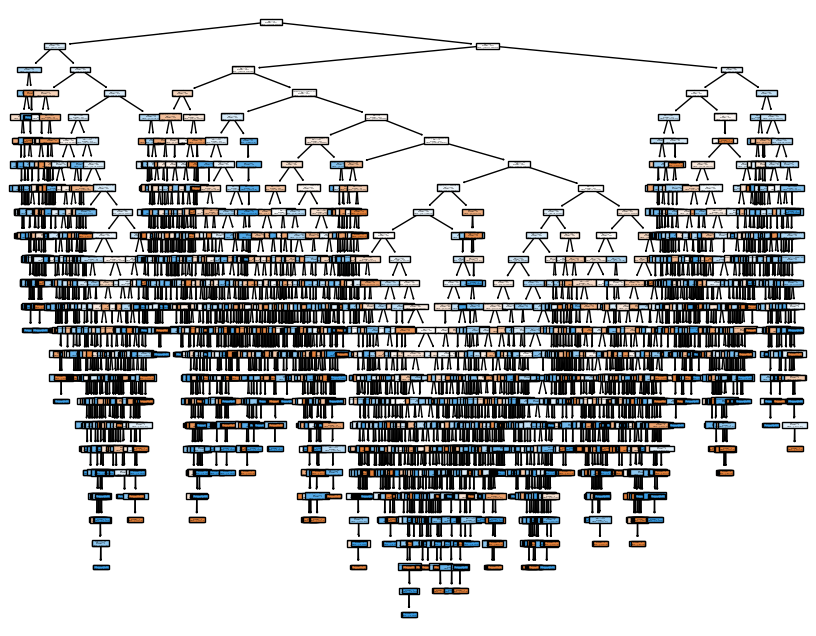

In [ ]:
plt.figure(figsize=(10, 8))
tree.plot_tree(rf_model.estimators_[0], feature_names = X.columns, filled = True)
plt.show()

That's a big tree❗❗❗

Let's see if the depth actually helps the accuracy or not with some depth limitations. We'll try varying depths of 5, 8, 12, and 20, and use K-Fold Cross Validation again.

In [ ]:
models = {
  "Depth: 5": RandomForestClassifier(random_state = 42, class_weight = 'balanced', max_depth = 5),
  "Depth: 8": RandomForestClassifier(random_state = 42, class_weight = 'balanced', max_depth = 8),
  "Depth: 12": RandomForestClassifier(random_state = 42, class_weight = 'balanced', max_depth = 12),
  "Depth: 20": RandomForestClassifier(random_state = 42, class_weight = 'balanced', max_depth = 20)
         }

for model_name, model in models.items():
    np.random.seed(42)
    score = cross_val_score(model, X_test_scaled, y_test, cv = skf)
    mean = score.mean()
    std = score.std()
    print(f"Model {model_name}\nCV Score Mean: {mean:.2f}\nCV Score Standard Deviation: {std:.2f}\n")

Model Depth: 5
CV Score Mean: 0.55
CV Score Standard Deviation: 0.03

Model Depth: 8
CV Score Mean: 0.62
CV Score Standard Deviation: 0.01

Model Depth: 12
CV Score Mean: 0.68
CV Score Standard Deviation: 0.01

Model Depth: 20
CV Score Mean: 0.69
CV Score Standard Deviation: 0.01



It seems like in this case, a higher depth limit does help the accuracy. So, we'll keep our original tree.

We also want to know which features are most relevant for predicting whether a transaction is illicit or not. We'll use some built-in features of Sci-Kit Learn in order to do this. This will tell us how the different columns of our dataframe influence the decision that the random forest makes to classify each transaction.

Feature Importance (Ranking Features by Relevance to Illicit Transactions):
                    Feature  Importance
0              Amount (USD)    0.297597
5  Shell Companies Involved    0.136800
4       Destination Country    0.135306
1                   Country    0.130826
3                  Industry    0.111133
6         Tax Haven Country    0.098559
2          Transaction Type    0.089778


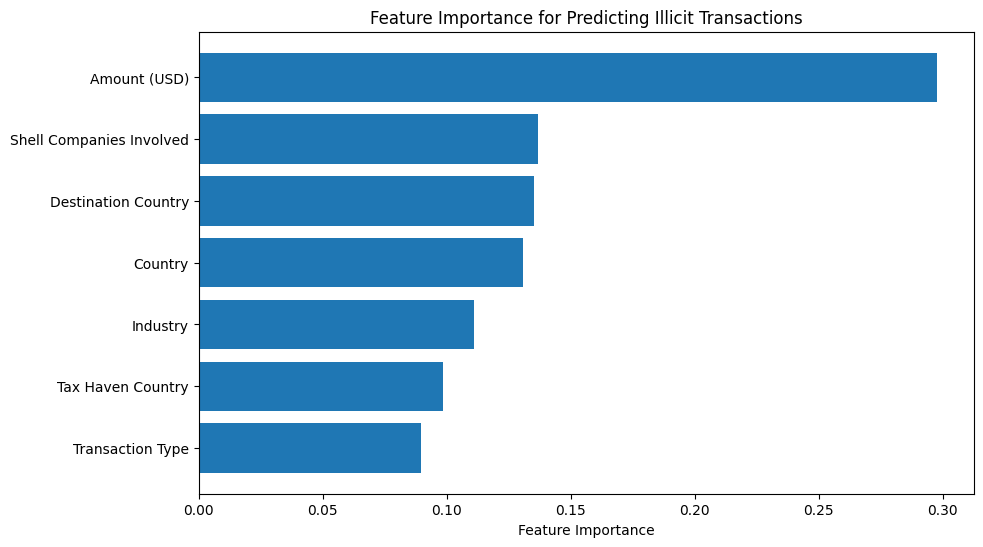

In [ ]:
# training a random forest classifier to evaluate feature importance
rf_model_feature_importance = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_feature_importance.fit(X_train, y_train)

feature_importances = rf_model_feature_importance.feature_importances_
features = X.columns

#making a new df for feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance (Ranking Features by Relevance to Illicit Transactions):")
print(feature_importance_df)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Predicting Illicit Transactions')
plt.gca().invert_yaxis()  # highest importance at the top
plt.show()


We can observe that transaction amount is the most relevant feature for predicting whether a transaction is illicit, as larger or unusual transaction amount significantly influence the likelihood of being illicit. Transactions involving shell companies are also a cause for concern and strong indicators of suspicious activity.

##(6) Insights and Conclusions

In our previous section, we developed a semi-accurate model for predicting if the source of the money in a transaction was legal, and therefore whether or not the transaction was illicit. While the model's accuracy leaves room for improvement, it serves as a strong baseline predictor for analyzing new datasets. Future refinements through advanced techniques like hyperparameter tuning and utilizing alternative algorithms that could further enhance its predictive capabilities.


Overall, the dataset provides conclusions for the most important characteristics in determining the legality of the source of money in the transactions. We found that our top four characteristics were the amount of money being sent, shell companies involved, destination country, and the country where the transaction occurred. Transactions with unusually high or low amounts tend to raise suspicion and are closely associated with illicit activity. The presence of shell companies was consistently found to be a strong indicator of potential illegality, even though the number of shell companies involved showed less direct correlation with illegal activity. Transactions directed to specific countries, especially tax havens or regions with weaker regulatory oversight, exhibited a higher likelihood of being flagged as illicit. Also, the originating country of a transaction plays a pivotal role, as some countries have a higher propensity for financial crimes or serve as hubs for laundering activities.

These characteristics are crucial in understanding how to identify an illegal money source in a transaction, and thus can be used as a red flag when these characteristics are found in a transaction.

Moreover, while the number of shell companies involved did not strongly correlate with the likelihood of a transaction being illicit, their mere presence in a transaction is a notable red flag. This underscores the importance of both individual feature relevance and their interactions in building effective detection models.

The insights from this analysis can be leveraged to create more robust and scalable models for detecting financial crimes. Overall, the identified features can guide policymakers and compliance teams in designing effective strategies to monitor and mitigate illicit financial flows.